In [7]:
import pandas as pd

In [9]:
#Reading in the CSV file
data = pd.read_csv("A1data.csv",sep=',',decimal='.',header=0, parse_dates=True)

In [11]:
data.head(2)

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25%,10%,33%,1%,78%,2018-2019
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19%,2%,27%,0%,62%,2015-2016


In [4]:
data.shape

(90, 11)

In [5]:
data.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                        object
Residence (Rural)            object
Residence (Urban)            object
Wealth quintile (Poorest)    object
Wealth quintile (Richest)    object
Time period                  object
dtype: object

In [6]:
data[["Countries and areas","Income Group","Time period"]].value_counts() # duplicated rows

Countries and areas  Income Group              Time period
Togo                 Low income (L)            2017           3
Guatemala            Upper middle income (UM)  2014-2015      2
Algeria              Upper middle income (UM)  2018-2019      1
Sierra Leone         Low income (L)            2017           1
Senegal              Lower middle income (LM)  2017           1
                                                             ..
Georgia              Upper middle income (UM)  2018           1
Gambia               Low income (L)            2018           1
Egypt                Lower middle income (LM)  2015           1
Ecuador              Upper middle income (UM)  2018           1
Zimbabwe             Lower middle income (LM)  2018-2019      1
Length: 87, dtype: int64

In [7]:
data.loc[data.duplicated()] # To see the rows that are duplicated

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
30,GTM,Guatemala,LAC,LAC,Upper middle income (UM),10%,3%,20%,0%,49%,2014-2015
75,TGO,Togo,SSA,WCA,Low income (L),24%,8%,49%,0%,78%,2017
76,TGO,Togo,SSA,WCA,Low income (L),24%,8%,49%,0%,78%,2017


In [8]:
data = data.drop_duplicates() # Removing the duplicated data

In [9]:
data[["Countries and areas"]].value_counts() #Checking if the error was fixed.

Countries and areas  
Algeria                  1
North Macedonia          1
Serbia                   1
Senegal                  1
Sao Tome and Principe    1
                        ..
Georgia                  1
Gambia                   1
Egypt                    1
Ecuador                  1
Zimbabwe                 1
Length: 87, dtype: int64

In [10]:
data[["Income Group"]].value_counts() # Error 2- Data Entry Errors - Typos

Income Group             
Upper middle income (UM)     32
Lower middle income (LM)     28
Low income (L)               18
High income (H)               7
Lower middle income (LLM)     1
Lower middle income (LMM)     1
dtype: int64

In [11]:
#Correcting the typos in Income Group

data.loc[(data["Income Group"] == "Lower middle income (LLM)") | (data["Income Group"] == "Lower middle income (LMM)"), "Income Group"]= "Lower middle income (LM)"

In [12]:
data["Income Group"].value_counts() # Checking if the errors were rectified

Upper middle income (UM)    32
Lower middle income (LM)    30
Low income (L)              18
High income (H)              7
Name: Income Group, dtype: int64

In [13]:
data[["Time period"]].value_counts() #Error 3 - Impossible values and Inconsistencies

Time period
2018           16
2019            9
2018-2019       9
2017            8
2013            6
2012            5
2017-2018       5
2015-2016       4
2015            4
2016            3
2010            3
2014-2015       3
2014            3
2011-2012       3
2016-2017       2
2011            1
2012-2099       1
2076            1
3562            1
dtype: int64

In [14]:
def year(i): # Creating a function to split time periods and take in only the starting year
    if "-" in i:
        i= i.split("-")
        return(i[0])
    else:
        return(i)

data["Time period"]= data["Time period"].apply(year) #applying the above function

In [15]:
data[["Time period"]].value_counts()

Time period
2018           25
2017           13
2019            9
2015            8
2012            6
2013            6
2014            6
2016            5
2011            4
2010            3
2076            1
3562            1
dtype: int64

In [16]:
data["Time period"] = data["Time period"].astype(int)

In [17]:
data = data[data["Time period"] <= 2024] #Removing impossible values

In [18]:
data[["Time period"]].value_counts()

Time period
2018           25
2017           13
2019            9
2015            8
2012            6
2013            6
2014            6
2016            5
2011            4
2010            3
dtype: int64

In [19]:
data.isna().sum() # Error 4 Missing values

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            5
Residence (Urban)            4
Wealth quintile (Poorest)    7
Wealth quintile (Richest)    7
Time period                  0
dtype: int64

In [20]:
missing_values= data.loc[data[["Residence (Rural)","Residence (Urban)","Wealth quintile (Poorest)","Wealth quintile (Richest)"]].\
isna().all(axis=1)]

In [21]:
missing_values #Finding the rows will Null values across all 4 columns

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
2,ARG,Argentina,LAC,LAC,Upper middle income (UM),43%,NaN,NaN,NaN,NaN,2011
54,NER,Niger,SSA,WCA,Low income (L),4%,NaN,NaN,NaN,NaN,2014
66,ZAF,South Africa,SSA,ESA,Upper middle income (UM),20%,NaN,NaN,NaN,NaN,2014
84,GBR,United Kingdom,ECA,WE,High income (H),99%,NaN,NaN,NaN,NaN,2016


In [22]:
data = data.drop(missing_values.index) # Dropping the rows will Null values across all 4 columns

In [23]:
data.isna().sum() #Updated Missing values

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            1
Residence (Urban)            0
Wealth quintile (Poorest)    3
Wealth quintile (Richest)    3
Time period                  0
dtype: int64

In [24]:
data.loc[data[["Residence (Rural)","Residence (Urban)","Wealth quintile (Poorest)","Wealth quintile (Richest)"]].\
isna().any(axis=1)] #Remaining null values

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
25,EGY,Egypt,MENA,MENA,Lower middle income (LM),18%,9%,32%,NaN,NaN,2015
47,MEX,Mexico,LAC,LAC,Upper middle income (UM),43%,12%,54%,NaN,NaN,2018
83,UKR,Ukraine,ECA,EECA,Lower middle income (LM),66%,NaN,66%,NaN,NaN,2013


In [25]:
data.dtypes

ISO3                         object
Countries and areas          object
Region                       object
Sub-region                   object
Income Group                 object
Total                        object
Residence (Rural)            object
Residence (Urban)            object
Wealth quintile (Poorest)    object
Wealth quintile (Richest)    object
Time period                   int64
dtype: object

In [26]:
data[["Total", "Residence (Rural)", "Residence (Urban)", "Wealth quintile (Poorest)", "Wealth quintile (Richest)"]] = \
data[["Total", "Residence (Rural)", "Residence (Urban)", "Wealth quintile (Poorest)", "Wealth quintile (Richest)"]].replace("%", "", regex=True).apply(pd.to_numeric)

#converting the columns into numeric for further analysis and replacing the "%" to blanks

In [27]:
data.dtypes #checking if it has been converted to numeric

ISO3                          object
Countries and areas           object
Region                        object
Sub-region                    object
Income Group                  object
Total                          int64
Residence (Rural)            float64
Residence (Urban)              int64
Wealth quintile (Poorest)    float64
Wealth quintile (Richest)    float64
Time period                    int64
dtype: object

In [28]:
data.head() #checking if the percentage sign has been removed

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25,10.0,33,1.0,78.0,2018
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19,2.0,27,0.0,62.0,2015
3,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71.0,89,44.0,99.0,2015
4,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,31.0,48,8.0,73.0,2019
5,BRB,Barbados,LAC,LAC,High income (H),68,66.0,69,20.0,100.0,2012


In [29]:
data = data.fillna(data.mean(axis=0))

/var/folders/yd/rntw440s5nqb2tr4l21_n52r0000gn/T/ipykernel_68642/432411056.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean(axis=0))


In [30]:
data.isna().sum() #checking if the Missing values are corrected

ISO3                         0
Countries and areas          0
Region                       0
Sub-region                   0
Income Group                 0
Total                        0
Residence (Rural)            0
Residence (Urban)            0
Wealth quintile (Poorest)    0
Wealth quintile (Richest)    0
Time period                  0
dtype: int64

In [31]:
data.shape

(81, 11)

In [32]:
data.loc[
    (data["Total"] > 100) |
    (data["Residence (Rural)"] > 100) |
    (data["Residence (Urban)"] > 100) |
    (data["Wealth quintile (Poorest)"] > 100) |
    (data["Wealth quintile (Richest)"] > 100)
]
#finding the row with more than 100% as its value - Error 5

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
59,RUS,Russian Federation,ECA,EECA,Upper middle income (UM),86,79.0,94,88.0,110.0,2018


In [33]:
data.loc[59,"Wealth quintile (Richest)"] =100 #changing the percentage to 100% for the specific row where the error was found

In [34]:
data.to_csv('S3991481-cleaned-A1data.csv', index=False) #copying the cleaned data to CSV

# Task 2: Data Exploration

## Task 2.1 

In [38]:
#Reading in the cleaned CSV file
new_data = pd.read_csv('S3991481-cleaned-A1data.csv',sep=',',decimal='.',header=0) 

In [39]:
new_data.head() #ensuring the data is uploaded correctly

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
0,DZA,Algeria,MENA,MENA,Upper middle income (UM),25,10.0,33,1.0,78.0,2018
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19,2.0,27,0.0,62.0,2015
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),81,71.0,89,44.0,99.0,2015
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,31.0,48,8.0,73.0,2019
4,BRB,Barbados,LAC,LAC,High income (H),68,66.0,69,20.0,100.0,2012


In [40]:
new_data.shape

(81, 11)

In [41]:
new_data.dtypes

ISO3                          object
Countries and areas           object
Region                        object
Sub-region                    object
Income Group                  object
Total                          int64
Residence (Rural)            float64
Residence (Urban)              int64
Wealth quintile (Poorest)    float64
Wealth quintile (Richest)    float64
Time period                    int64
dtype: object

In [42]:
new_data.groupby(["Region"])[["Total"]].median() #Computing the Median (of the total percentage) for each Region.

,Total
Region,
EAP,47.5
ECA,77.5
LAC,43.0
MENA,33.0
SA,34.0
SSA,7.0


In [119]:
new_data.groupby(["Region"])[["Total"]].describe().round(2)

Total                                              
       count   mean    std   min   25%   50%    75%    max
Region                                                    
EAP      8.0  47.75  30.13   1.0  29.0  47.5  67.50   92.0
ECA     14.0  66.50  25.30  18.0  50.5  77.5  84.75   94.0
LAC     19.0  41.26  25.74   4.0  23.5  43.0  58.00   87.0
MENA     6.0  32.33  13.41  18.0  20.5  33.0  41.00   50.0
SA       5.0  37.60  30.07   8.0   9.0  34.0  68.00   69.0
SSA     29.0  15.00  22.00   0.0   3.0   7.0  16.00  100.0

In [43]:
# BoxPlot of overall/total percentage of children in a school attendance age that have internet connection at home by region

In [44]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Percentage')

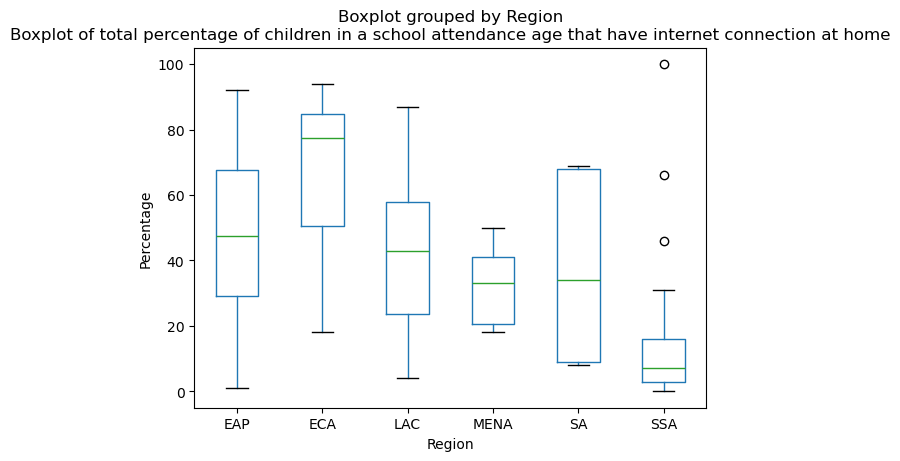

In [45]:
new_data.dropna().boxplot(column="Total",by= "Region",grid=False)
plt.title("Boxplot of total percentage of children in a school attendance age that have internet connection at home")
plt.ylabel("Percentage")


## Task 2.2 

In [48]:
#Computing the Mean (of the percentage of school-age children who have internet connection at home) for Wealth quintile (Poorest) and Wealth quintile (Richest)
print("Mean of the Quartiles(in %):\n",new_data[["Wealth quintile (Poorest)","Wealth quintile (Richest)"]].mean().round(2))

Mean of the Quartiles(in %):
 Wealth quintile (Poorest)    18.24
Wealth quintile (Richest)    61.06
dtype: float64


In [49]:
#Display/list the top 10 countries with the highest percentages for Wealth quintile (Poorest)
poor_country= new_data[["Countries and areas","Wealth quintile (Poorest)"]].sort_values(by= ["Wealth quintile (Poorest)"] , ascending=False)

In [50]:
poor_country.head(10)

,Countries and areas,Wealth quintile (Poorest)
61,Somalia,100.0
55,Russian Federation,88.0
8,Brazil,84.0
69,Tonga,83.0
14,Chile,75.0
63,Sri Lanka,71.0
67,North Macedonia,68.0
59,Serbia,65.0
34,Japan,64.0
38,Kyrgyzstan,56.0


In [51]:
#Display/list the top 10 countries with the highest percentages for Wealth quintile (Richest)
rich_country= new_data[["Countries and areas","Wealth quintile (Richest)"]].sort_values(by= ["Wealth quintile (Richest)"] , ascending=False)

In [52]:
rich_country.head(10)

,Countries and areas,Wealth quintile (Richest)
67,North Macedonia,100.0
9,Bulgaria,100.0
59,Serbia,100.0
61,Somalia,100.0
55,Russian Federation,100.0
4,Barbados,100.0
63,Sri Lanka,99.0
14,Chile,99.0
26,Georgia,99.0
17,Costa Rica,99.0


## Task 2.3 

In [ ]:
LM_data = new_data.loc[new_data["Income Group"]== "Lower middle income (LM)"]

In [56]:
LM_data.head()

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence (Rural),Residence (Urban),Wealth quintile (Poorest),Wealth quintile (Richest),Time period
1,AGO,Angola,SSA,ESA,Lower middle income (LM),19,2.0,27,0.0,62.0,2015
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),34,31.0,48,8.0,73.0,2019
6,BOL,Bolivia (Plurinational State of),LAC,LAC,Lower middle income (LM),12,3.0,17,1.0,56.0,2016
11,CMR,Cameroon,SSA,WCA,Lower middle income (LM),5,0.0,10,0.0,23.0,2014
18,CIV,Cote d'Ivoire,SSA,WCA,Lower middle income (LM),4,1.0,7,0.0,16.0,2016


In [57]:
LM_data[["Residence (Rural)","Residence (Urban)"]].describe().round(2)

,Residence (Rural),Residence (Urban)
count,30.00,30.00
mean,12.35,30.00
std,15.21,22.31
min,0.00,3.00
25%,2.00,11.00
50%,7.00,25.50
75%,17.00,49.50
max,69.00,84.00
